# 📊 Visualização com PyWaffle e WordCloud
Este notebook inclui teoria, exemplos com dados simples e grandes datasets, e uma secção final com exercícios práticos.

## 🧩 PyWaffle - Teoria
**PyWaffle** é uma biblioteca baseada em matplotlib para criar gráficos de waffle. Estes gráficos representam valores em grelhas de quadrados ou ícones e são ideais para visualizar proporções de categorias de forma clara e visual.

**Principais parâmetros:**
- `values`: dicionário com categorias e valores
- `rows`: número de linhas da grelha
- `labels`: rótulos informativos
- `icons`: ícones Font Awesome (opcional)
- `legend`, `title`: configurações visuais adicionais

**Vantagens:**
- Muito visual e apelativo
- Ótimo para dashboards e relatórios executivos

**Limitações:**
- Não recomendado para categorias com valores muito pequenos
- Pode distorcer perceção se não houver contexto adequado

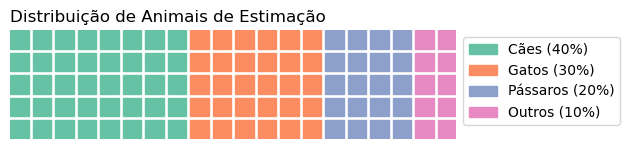

In [12]:
# Exemplo simples com PyWaffle
from pywaffle import Waffle
import matplotlib.pyplot as plt

data = {'Cães': 40, 'Gatos': 30, 'Pássaros': 20, 'Outros': 10}

fig = plt.figure(
    FigureClass=Waffle,
    rows=5,
    values=data,
    title={'label': 'Distribuição de Animais de Estimação', 'loc': 'left'},
    labels=[f"{k} ({v}%)" for k, v in data.items()],
    legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1)}
)
plt.show()

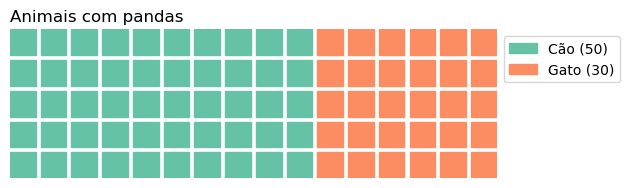

In [6]:
# Exemplo com pandas
import pandas as pd

df = pd.DataFrame({'Animal': ['Cão', 'Gato'], 'Qtd': [50, 30]})
data_dict = dict(zip(df['Animal'], df['Qtd']))

fig = plt.figure(
    FigureClass=Waffle,
    rows=5,
    values=data_dict,
    title={'label': 'Animais com pandas', 'loc': 'left'},
    labels=[f"{k} ({v})" for k, v in data_dict.items()],
    legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1)}
)
plt.show()

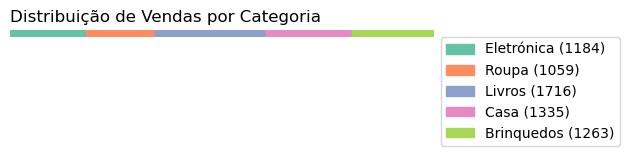

In [7]:
# Exemplo com grande dataset (dataset fictício de vendas)
import numpy as np
np.random.seed(0)

categorias = ['Eletrónica', 'Roupa', 'Livros', 'Casa', 'Brinquedos']
vendas = np.random.randint(500, 2000, size=len(categorias))
df_vendas = pd.DataFrame({'Categoria': categorias, 'Vendas': vendas})
data_vendas = dict(zip(df_vendas['Categoria'], df_vendas['Vendas']))

fig = plt.figure(
    FigureClass=Waffle,
    rows=10,
    values=data_vendas,
    title={'label': 'Distribuição de Vendas por Categoria', 'loc': 'left'},
    labels=[f"{k} ({v})" for k, v in data_vendas.items()],
    legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1)}
)
plt.show()

## ☁️ WordCloud - Teoria
**WordCloud** permite gerar representações gráficas da frequência de palavras num texto. Palavras mais frequentes são apresentadas com maior destaque.

**Parâmetros importantes:**
- `generate(texto)`: gera a nuvem a partir de uma string
- `background_color`: cor de fundo (ex: 'white')
- `colormap`: paleta de cores (ex: 'viridis')
- `max_words`: número máximo de palavras
- `stopwords`: palavras irrelevantes a ignorar
- `width`, `height`: dimensões da imagem

**Vantagens:**
- Intuitivo e fácil de interpretar
- Excelente para resumos visuais

**Limitações:**
- Perde o contexto
- Pode necessitar de limpeza textual

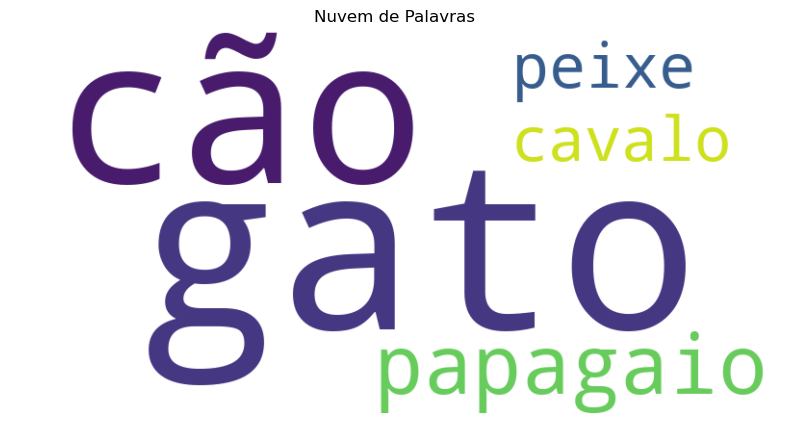

In [8]:
# Exemplo básico de WordCloud
from wordcloud import WordCloud
texto = 'gato cão papagaio gato cão peixe gato cavalo gato papagaio cão'

wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white'
).generate(texto)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nuvem de Palavras')
plt.show()

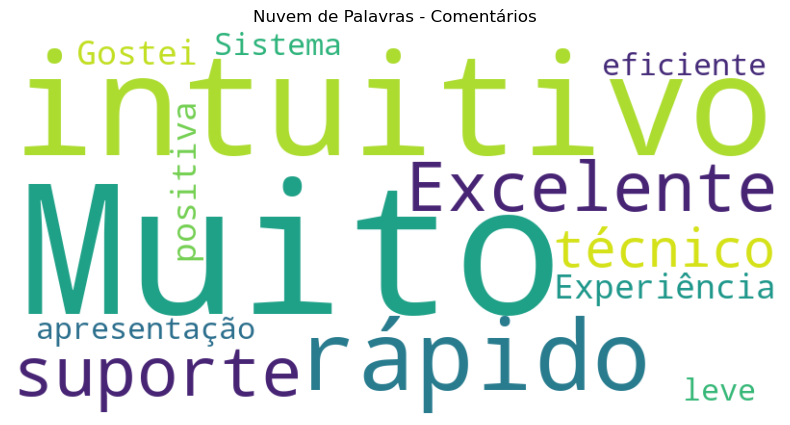

In [13]:
# Exemplo com pandas e WordCloud
from wordcloud import STOPWORDS

df = pd.DataFrame({
    'comentarios': [
        'Muito intuitivo e rápido',
        'Excelente suporte técnico',
        'Experiência positiva',
        'Gostei da apresentação',
        'Sistema leve e eficiente'
    ]
})

texto = ' '.join(df['comentarios'])
stopwords = set(STOPWORDS)
stopwords.update(['de', 'e', 'da', 'ao'])

wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    colormap='viridis',
    stopwords=stopwords,
    max_words=50
).generate(texto)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nuvem de Palavras - Comentários')
plt.show()

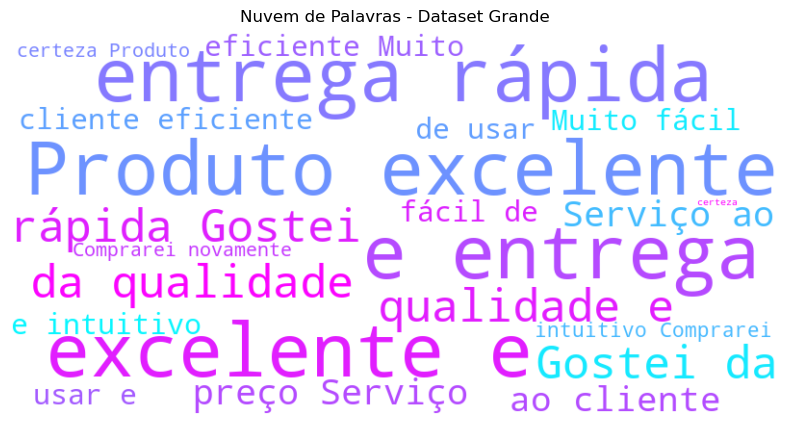

In [10]:
# Exemplo com dataset grande (simulado)
comentarios = [
    'Produto excelente e entrega rápida',
    'Gostei da qualidade e do preço',
    'Serviço ao cliente eficiente',
    'Muito fácil de usar e intuitivo',
    'Comprarei novamente com certeza'
] * 100  # duplicar para simular grande volume

texto_grande = ' '.join(comentarios)
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    colormap='cool',
    max_words=100
).generate(texto_grande)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nuvem de Palavras - Dataset Grande')
plt.show()

### 📈 PyWaffle com Dataset Real (CSV)

In [ ]:
# Leitura de dados reais de vendas a partir de CSV
import pandas as pd
from pywaffle import Waffle
import matplotlib.pyplot as plt

# Carregar dataset
df_vendas = pd.read_csv('./dataset_vendas.csv')
data_vendas = dict(zip(df_vendas['Categoria'], df_vendas['Vendas']))

# Criar gráfico
fig = plt.figure(
    FigureClass=Waffle,
    rows=10,
    values=data_vendas,
    title={'label': 'Distribuição Real de Vendas por Categoria', 'loc': 'left'},
    labels=[f"{k} ({v})" for k, v in data_vendas.items()],
    legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1)}
)
plt.show()

### ☁️ WordCloud com Dataset Real (CSV)

In [ ]:
# Leitura de comentários reais de clientes a partir de CSV
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Carregar dataset
df_comentarios = pd.read_csv('dataset_comentarios.csv')
texto = ' '.join(df_comentarios['comentarios'])

# Palavras a ignorar
stopwords = set(STOPWORDS)
stopwords.update(['de', 'e', 'da', 'ao'])

# Gerar WordCloud
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    colormap='plasma',
    stopwords=stopwords,
    max_words=100
).generate(texto)

# Visualizar
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nuvem de Palavras - Comentários Reais')
plt.show()

## 📝 Lista de Exercícios
1. Cria um gráfico Waffle com 6 categorias de um dataset real ou fictício.
2. Usa `pandas` para importar um ficheiro CSV e gera o gráfico com `PyWaffle`.
3. Gera uma `WordCloud` com base numa coluna de comentários de clientes.
4. Testa diferentes valores de `max_words`, `colormap` e `background_color`.
5. Identifica as palavras mais frequentes e remove palavras irrelevantes usando `stopwords`.
6. Compara a WordCloud gerada antes e depois da limpeza do texto.

In [ ]:
# 1 criar gráfico de waffle

import matplotlib.pyplot as plt
from pywaffle import Waffle

data = {
    'Categoria A': 30,
    'Categoria B': 20,
    'Categoria C': 15,
    'Categoria D': 10,
    'Categoria E': 15,
    'Categoria F': 10
}

fig = plt.figure(
    FigureClass=Waffle,
    rows=5,
    values=data,
    title={'label': 'Distribuição de Categorias', 'loc': 'left'},
    labels=[f"{k} ({v}%)" for k, v in data.items()],
    legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1)}
)
plt.show()


In [ ]:
# 2 sa `pandas` para importar um ficheiro CSV e gera o gráfico com `PyWaffle`.

import pandas as pd
df= pd.read_csv(r'C:\Users\HP\Desktop\Formação\Eisnt\UFCD 10809 - Visualização de dados em Python\dataset_vendas.csv')
data_dict = dict(zip(df['Categoria'], df['Vendas']))

fig = plt.figure(
    FigureClass=Waffle,
    rows=5,
    values=data_dict,
    title={'label': 'Vendas por categoria', 'loc': 'left'},
    labels=[f"{k} ({v})" for k, v in data_dict.items()],
    legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1)}
)
plt.show()


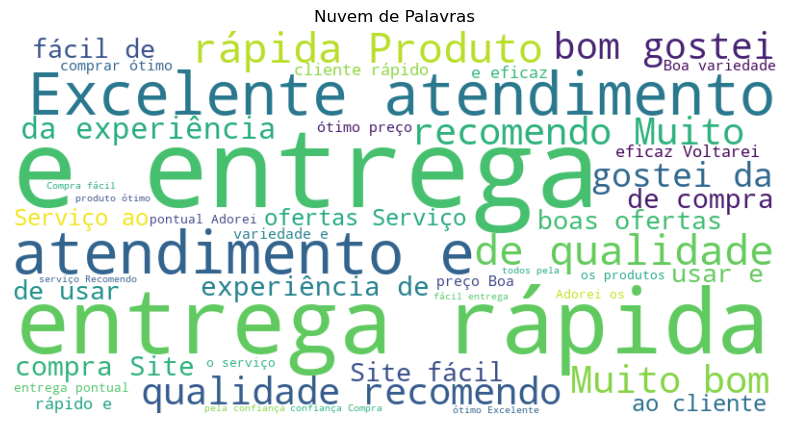

In [28]:
# 3 Gera uma `WordCloud` com base numa coluna de comentários de clientes.

from wordcloud import WordCloud
import pandas as pd
import os

name_of_file = r'C:\Users\HP\Desktop\Formação\Eisnt\UFCD 10809 - Visualização de dados em Python\dataset_comentarios.csv'

if os.path.exists(name_of_file):
    df= pd.read_csv(name_of_file)
    texto = ' '.join(df['comentarios'])         
else:
    print("O ficheiro não existe.")
    
 
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white'
).generate(texto)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nuvem de Palavras')
plt.show()

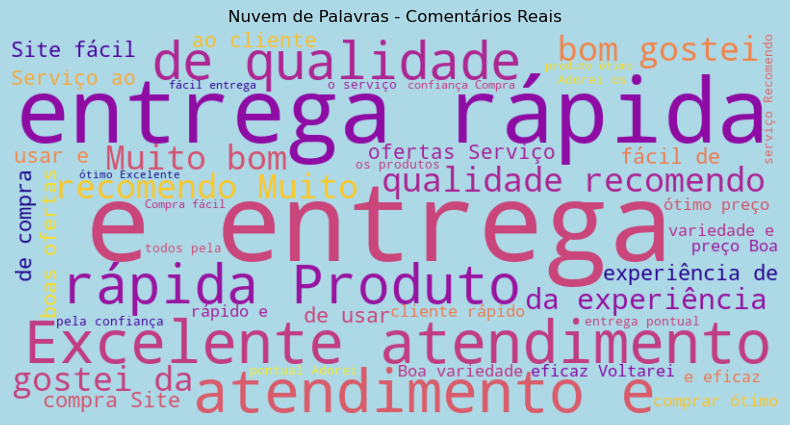

In [18]:
# 4 Testa diferentes valores de `max_words`, `colormap` e `background_color`.

# Gerar WordCloud
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='lightblue',
    colormap='plasma',
    max_words=100
).generate(texto)

# Visualizar
plt.figure(figsize=(10, 5),facecolor='lightblue')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nuvem de Palavras - Comentários Reais')
plt.show()

In [ ]:
# 5 Identifica as palavras mais frequentes e remove palavras irrelevantes usando `stopwords`.

# Palavras a ignorar
stopwords = set(STOPWORDS)
stopwords.update(['de', 'e','o', 'da', 'ao'])

wordcloud = WordCloud(
    width=800,
    height=400,
    stopwords=stopwords,
    background_color='white',
    
).generate(texto)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nuvem de Palavras')
plt.show()

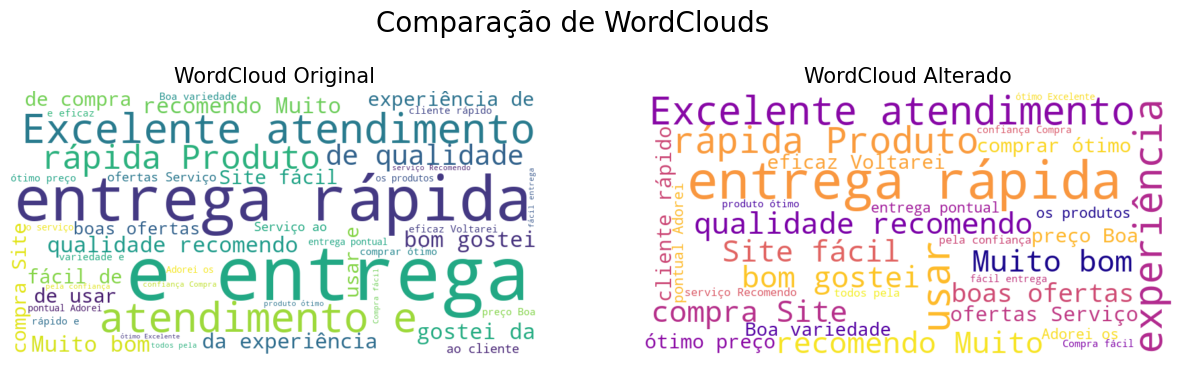

In [ ]:
# 6 Compara a WordCloud gerada antes e depois da limpeza do texto.

figure, axes = plt.subplots(1, 2, figsize=(15, 7))
figure.suptitle('Comparação de WordClouds', fontsize=20, y=.8)

# WordCloud original
wordcloud_original = WordCloud(
    width=800,
    height=400,
    background_color='white'
).generate(texto)
axes[0].imshow(wordcloud_original, interpolation='bilinear')
axes[0].axis('off')
axes[0].set_title('WordCloud Original', fontsize=15)

# WordCloud Alterado
# Palavras a ignorar
stopwords = set(STOPWORDS)
stopwords.update(['de', 'e','o', 'da', 'ao'])

wordcloud_alterado = WordCloud(
    width=800,
    height=400,
    stopwords=stopwords,
    background_color='white',
    colormap='plasma',
   # max_words=50
).generate(texto)

axes[1].imshow(wordcloud_alterado, interpolation='bilinear')
axes[1].axis('off')
axes[1].set_title('WordCloud Alterado', fontsize=15)

plt.show()
